In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bbe5a870eed2cc340c5eda687dc6c377


In [13]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mizan teferi
Processing Record 2 of Set 1 | tripoli
Processing Record 3 of Set 1 | qaanaaq
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | tasiilaq
Processing Record 7 of Set 1 | sambava
Processing Record 8 of Set 1 | igrim
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | tilichiki
Processing Record 11 of Set 1 | flinders
Processing Record 12 of Set 1 | craig
Processing Record 13 of Set 1 | ryzdvyanyy
Processing Record 14 of Set 1 | kudahuvadhoo
Processing Record 15 of Set 1 | norman wells
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | rudiskes
Processing Record 18 of Set 1 | fredericton
Processing Record 19 of Set 1 | kichera
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | narsaq
Processing Record 22 of Set 1 | moundou
Processing Record 23 of Set 1 | san cris

Processing Record 38 of Set 4 | maghama
City not found. Skipping...
Processing Record 39 of Set 4 | hurricane
Processing Record 40 of Set 4 | myitkyina
Processing Record 41 of Set 4 | lompoc
Processing Record 42 of Set 4 | isfana
Processing Record 43 of Set 4 | yumen
Processing Record 44 of Set 4 | saskylakh
Processing Record 45 of Set 4 | north bend
Processing Record 46 of Set 4 | dornoch
Processing Record 47 of Set 4 | kaitangata
Processing Record 48 of Set 4 | olafsvik
Processing Record 49 of Set 4 | mapiri
Processing Record 50 of Set 4 | pirgos
Processing Record 1 of Set 5 | usinsk
Processing Record 2 of Set 5 | hilo
Processing Record 3 of Set 5 | flagstaff
Processing Record 4 of Set 5 | alenquer
Processing Record 5 of Set 5 | cherskiy
Processing Record 6 of Set 5 | iqaluit
Processing Record 7 of Set 5 | ilulissat
Processing Record 8 of Set 5 | fukue
Processing Record 9 of Set 5 | nucet
Processing Record 10 of Set 5 | halalo
City not found. Skipping...
Processing Record 11 of Set 5

Processing Record 31 of Set 8 | chicama
Processing Record 32 of Set 8 | ponta delgada
Processing Record 33 of Set 8 | maceio
Processing Record 34 of Set 8 | goderich
Processing Record 35 of Set 8 | undory
Processing Record 36 of Set 8 | hazorasp
Processing Record 37 of Set 8 | yurgamysh
Processing Record 38 of Set 8 | nizhniy tsasuchey
Processing Record 39 of Set 8 | comodoro rivadavia
Processing Record 40 of Set 8 | high level
Processing Record 41 of Set 8 | alekseyevka
Processing Record 42 of Set 8 | lubao
Processing Record 43 of Set 8 | general roca
Processing Record 44 of Set 8 | ulladulla
Processing Record 45 of Set 8 | kushmurun
Processing Record 46 of Set 8 | gillette
Processing Record 47 of Set 8 | remigio
Processing Record 48 of Set 8 | kazachinskoye
Processing Record 49 of Set 8 | gimli
Processing Record 50 of Set 8 | eyl
Processing Record 1 of Set 9 | tuy hoa
Processing Record 2 of Set 9 | sitka
Processing Record 3 of Set 9 | santa maria
Processing Record 4 of Set 9 | langsa

Processing Record 23 of Set 12 | phrae
Processing Record 24 of Set 12 | vaitupu
City not found. Skipping...
Processing Record 25 of Set 12 | shelburne
Processing Record 26 of Set 12 | takoradi
Processing Record 27 of Set 12 | half moon bay
Processing Record 28 of Set 12 | sabang
Processing Record 29 of Set 12 | konya
Processing Record 30 of Set 12 | ostersund
Processing Record 31 of Set 12 | la ronge
Processing Record 32 of Set 12 | srednekolymsk
Processing Record 33 of Set 12 | kirakira
Processing Record 34 of Set 12 | kibara
Processing Record 35 of Set 12 | kiboga
Processing Record 36 of Set 12 | salalah
Processing Record 37 of Set 12 | pemangkat
Processing Record 38 of Set 12 | ilo
Processing Record 39 of Set 12 | moyale
Processing Record 40 of Set 12 | zajas
Processing Record 41 of Set 12 | tidore
City not found. Skipping...
Processing Record 42 of Set 12 | mnogovershinnyy
Processing Record 43 of Set 12 | havoysund
Processing Record 44 of Set 12 | mustasaari
Processing Record 45 of

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mizan Teferi,6.9833,35.5833,67.69,58,0,2.95,ET,2021-03-09 21:03:08
1,Tripoli,32.8752,13.1875,59.99,76,0,8.41,LY,2021-03-09 21:03:08
2,Qaanaaq,77.4840,-69.3632,3.49,82,93,3.02,GL,2021-03-09 21:03:08
3,Rikitea,-23.1203,-134.9692,80.91,81,0,15.61,PF,2021-03-09 21:03:09
4,Ushuaia,-54.8000,-68.3000,62.60,51,75,4.61,AR,2021-03-09 21:00:30
5,Tasiilaq,65.6145,-37.6368,12.87,95,65,1.95,GL,2021-03-09 21:03:09
6,Sambava,-14.2667,50.1667,76.51,89,100,6.78,MG,2021-03-09 21:03:10
7,Igrim,63.1906,64.4162,-21.41,88,99,2.10,RU,2021-03-09 21:03:10
8,New Norfolk,-42.7826,147.0587,48.99,65,9,1.01,AU,2021-03-09 21:03:10
9,Tilichiki,60.4667,166.1000,-19.95,87,21,5.91,RU,2021-03-09 21:03:11


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mizan Teferi,ET,2021-03-09 21:03:08,6.9833,35.5833,67.69,58,0,2.95
1,Tripoli,LY,2021-03-09 21:03:08,32.8752,13.1875,59.99,76,0,8.41
2,Qaanaaq,GL,2021-03-09 21:03:08,77.4840,-69.3632,3.49,82,93,3.02
3,Rikitea,PF,2021-03-09 21:03:09,-23.1203,-134.9692,80.91,81,0,15.61
4,Ushuaia,AR,2021-03-09 21:00:30,-54.8000,-68.3000,62.60,51,75,4.61
...,...,...,...,...,...,...,...,...,...
584,Ambovombe,MG,2021-03-09 21:06:22,-25.1667,46.0833,74.30,79,0,11.97
585,Nemuro,JP,2021-03-09 21:06:01,43.3236,145.5750,34.45,96,83,17.69
586,Alpinopolis,BR,2021-03-09 21:06:22,-20.8636,-46.3881,70.86,87,85,2.30
587,Hualmay,PE,2021-03-09 21:06:23,-11.0964,-77.6139,77.47,63,14,6.40


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

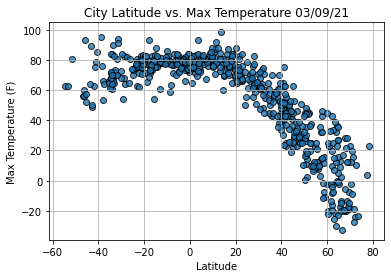

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

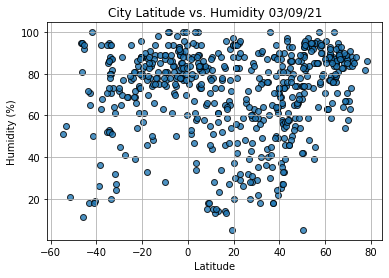

In [20]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


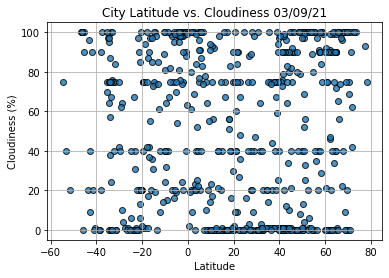

In [21]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

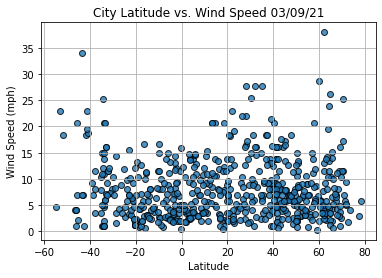

In [22]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress



In [24]:
   # Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()


In [25]:
index13 = city_data_df.loc[13]
index13

City                 Kudahuvadhoo
Country                        MV
Date          2021-03-09 21:03:12
Lat                        2.6708
Lng                       72.8944
Max Temp                    83.41
Humidity                       67
Cloudiness                    100
Wind Speed                   3.42
Name: 13, dtype: object

In [26]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4      False
       ...  
584    False
585     True
586    False
587    False
588     True
Name: Lat, Length: 589, dtype: bool

In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mizan Teferi,ET,2021-03-09 21:03:08,6.9833,35.5833,67.69,58,0,2.95
1,Tripoli,LY,2021-03-09 21:03:08,32.8752,13.1875,59.99,76,0,8.41
2,Qaanaaq,GL,2021-03-09 21:03:08,77.4840,-69.3632,3.49,82,93,3.02
5,Tasiilaq,GL,2021-03-09 21:03:09,65.6145,-37.6368,12.87,95,65,1.95
7,Igrim,RU,2021-03-09 21:03:10,63.1906,64.4162,-21.41,88,99,2.10


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

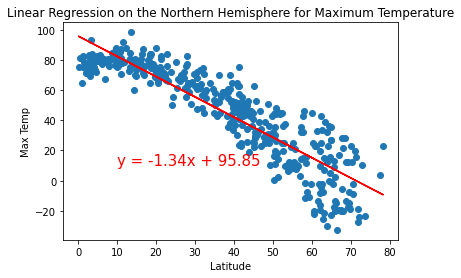

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,10))

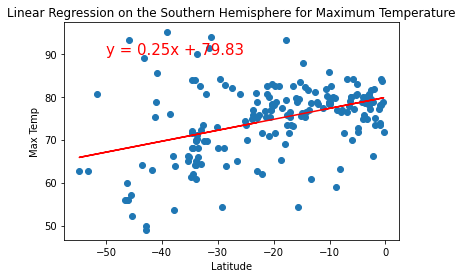

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

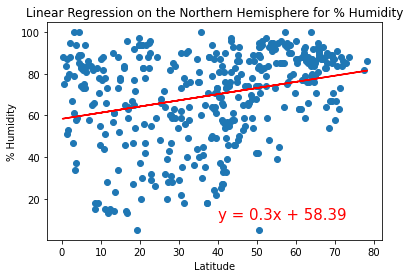

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

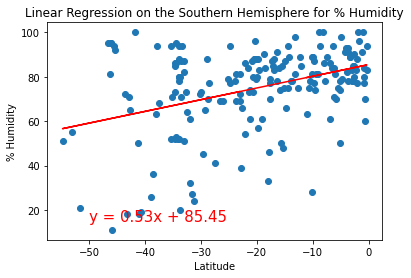

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

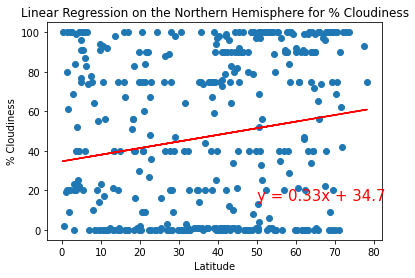

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(50,15))

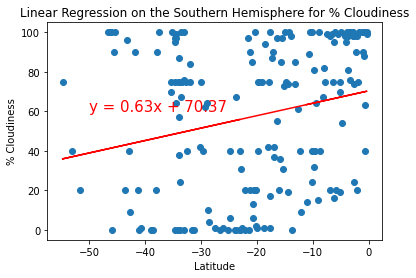

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

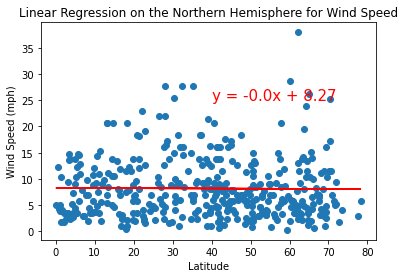

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed (mph)',(40,25))

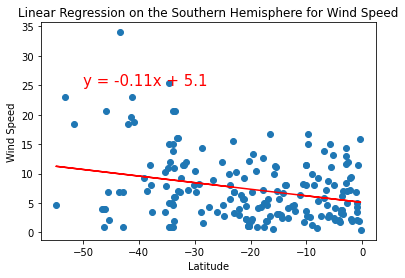

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,25))